# Big Data and Machine Learning in Healthcare Applications

## HW4

[Operational data challenge](https://medicalanalytics.group/operational-data-challenge)
We would like to invite all interested in machine learning and operational research to explore our operational dataset. You can download it from here:

Data only (zipped Excel file, 53MB)
Code and data (zipped code and Excel file, 63MB)
This data, describing patient waits in a hospital, was built for the following challenges (see our recent publication here: https://rdcu.be/b4ffC):

Predict patient wait times from the other operational features, as accurately as possible
Identify the smallest subset of features, sufficient for accurate wait time prediction across all four facilities in the dataset. The smallest model MAE should be at most 1-2 minutes worse compared to the best full model MAE
Invent (engineer) new features significantly improving model prediction quality
Overall, reducing MAE by more than 70% in comparison with the simple intercept model (predicting wait from its overall average) would be a significant step forward.

In [3]:
from pathlib import Path

import itertools
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

from typing import Callable, Union
%matplotlib inline

## Read Data

In [4]:
data_path = Path("../input")
file_stem = "WaitData.Published"
try:
    df = pd.read_pickle(data_path/f"{file_stem}.pkl")
except FileNotFoundError:
    # only interested in tab F3
    df = pd.read_excel(data_path/f"{file_stem}.xlsx", sheet_name="F3")
    pd.to_pickle(df, data_path/f"{file_stem}.pkl")

In [5]:
print(f"{len(df)} records in our data")

23583 records in our data


## Problem description

Time for building more models! – and now, after learning how to find and engineer their features, we
can really look into using the most efficient, interpretable predictions. Model Interpretability is
particularly appreciated in healthcare, where we want to understand why certain thing happen.
Selecting the best short models is one of the best approaches to interpretability.
Getting the data: Please go to this ”Data Challenge” web page,
https://medicalanalytics.group/operational-data-challenge/
and click on the “Data only” link there to download the data 1 .
In the sheet, use F3 tab (dataset) ONLY: delete F1, F2 and F4, to load faster in Python. Also, drop all
variables with names prefixed with x_ (these are the original timestamps, they make very little sense as
model features).
Wait will be our target variable we want to predict/model.
The last sheet in this file explains the features – most of them were engineered, and you should
understand how by now. But there are tons of them, and we have to sort this out.
Fitting the model: We can explore different machine learning models, but let’s pick linear regression,
since it takes little time to compute. So if Y is the Wait, and X – everything else, you can fit regression
with this code:

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)
Ypred = model.predict(X) # use trained regression model to predict
r = Y-Ypred # compute prediction error (residual)
e = abs(r).mean() # compute model error


In [6]:
# dropping all date based columns

clean_df = df.loc[:,~df.columns.str.startswith('x_')]
clean_df.head()

,Wait,SumHowEarlyWaiting,AvgHowEarlyWaiting,LineCount0Strict,SumWaits,LineCount0,LineCount1,LineCount2,LineCount3,LineCount4,...,NumAddOnsToday,NumAddOnsLastW2,NumScheduledNextSlot,NumScheduledNextW2,SumTimeToCompleteNextSlot,SumTimeToCompleteNextW2,WithContrastCountWaiting,WithAndWithoutContrastCountWaiting,WithContrastCountInProgress,WithAndWithoutContrastCountInProgress
0,0,372,62,6,249,6,5,6,6,4,...,4,2,0,0,0,0,3,1,1,0
1,-3,335,67,3,195,5,4,6,6,5,...,4,1,2,0,32,0,2,1,2,0
2,-25,274,68,4,150,4,5,6,4,6,...,4,1,1,1,13,16,1,1,3,0
3,36,369,73,2,179,5,6,4,5,5,...,3,1,2,1,45,16,3,1,1,0
4,-21,438,73,5,192,6,5,5,6,5,...,3,0,2,1,32,15,4,0,0,1


In [7]:
clean_df.columns

Index([&#39;Wait&#39;, &#39;SumHowEarlyWaiting&#39;, &#39;AvgHowEarlyWaiting&#39;, &#39;LineCount0Strict&#39;,
       &#39;SumWaits&#39;, &#39;LineCount0&#39;, &#39;LineCount1&#39;, &#39;LineCount2&#39;, &#39;LineCount3&#39;,
       &#39;LineCount4&#39;, &#39;FlowCount2&#39;, &#39;FlowCount4&#39;, &#39;SchFlowCount2&#39;,
       &#39;SchFlowCount4&#39;, &#39;FutFlowCount2&#39;, &#39;FutFlowCount4&#39;, &#39;DelayCount&#39;,
       &#39;DelayCountLastHour&#39;, &#39;mintime&#39;, &#39;maxtime&#39;, &#39;AheadCount&#39;,
       &#39;ThoracicCount&#39;, &#39;PediatricCount&#39;, &#39;NeuroCount&#39;, &#39;AbdominalCount&#39;,
       &#39;VascularCount&#39;, &#39;CardiacCount&#39;, &#39;MSKCount&#39;, &#39;NumScannersUsedToday&#39;,
       &#39;SumInProgress&#39;, &#39;BeforeSlot&#39;, &#39;AfterSlot&#39;, &#39;Median5&#39;, &#39;MostRecent1&#39;,
       &#39;MostRecent2&#39;, &#39;MostRecent3&#39;, &#39;MostRecent4&#39;, &#39;MostRecent5&#39;, &#39;StartTime&#39;,
       &#39;StartTime2&#

## Homework specifications

In [8]:
# Question 5

model = linear_model.LinearRegression()
X = clean_df.iloc[:,1:]
Y = clean_df.iloc[:,0]
model.fit(X, Y)
Ypred = model.predict(X) # use trained regression model to predict
r = Y-Ypred # compute prediction error (residual)
e = abs(r).mean() # compute model error

In [9]:
print(f"Mean Absolute Error:  {e}")

Mean Absolute Error:  23.166288936347676


In [11]:
assert round(abs(r).median(),1)==19.1, "Median Absolute Error should be 19.1"

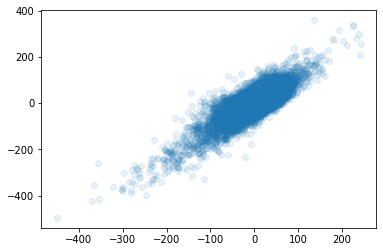

In [12]:
plt.scatter(Ypred, Y, alpha=.1)
plt.show()

In [13]:
# Question 6
# Run Python feature selection
if True: # just in case I want to disable this part
    print("\nPython feature selection:")
    from sklearn.feature_selection import RFE
    from itertools import compress
    for nFeatures in range(1,4):
        rfe = RFE(model, n_features_to_select=nFeatures)
        X_rfe = rfe.fit_transform(X,Y) #transforming data using RFE
        #Fitting the data to model
        model.fit(X_rfe,Y)
        #print(rfe.support_)
        #print(rfe.ranking_)
        cols = list(compress( X.columns, rfe.support_))
        model.fit(X[cols],Y)
        e = abs(Y-model.predict(X[cols])).mean()
        print(e, cols)


Python feature selection:
32.50541172120526 [&#39;CardiacCount&#39;]
31.224937706982562 [&#39;CardiacCount&#39;, &#39;DelayedInLine&#39;]
31.25752894868893 [&#39;CardiacCount&#39;, &#39;StartTime&#39;, &#39;DelayedInLine&#39;]


In [14]:

%%time

def ols_model(X, Y):
    "Ordinary Least Squares Regression from HW"
    model = linear_model.LinearRegression()
    model.fit(X, Y)
    Ypred = model.predict(X) # use trained regression model to predict
    e = abs(Y - Ypred).mean()
    return {"Error":e, "Model":model, "Params": X.columns}


class FeatureSelector:
    """ Class to contain feature selection algorithms
        To use this class, models should be defined
        as a function and return a dict containing:
        Error, Model and Params
    """ 
    def __init__(self, model:Callable, X:pd.DataFrame, y:pd.Series) -> None:
        self.model = model
        self.X = X
        self.y = y

    @staticmethod
    def best_model(results:list) -> dict:
        "Returns model with minimum error"
        models = pd.DataFrame(results)
        best_model = models.loc[models['Error'].argmin()]
        return best_model

    def best_subset(self, k:int) -> dict:
        "Returns best model of any k parameters"
        results = [self.model(self.X[list(params)],self.y) \
            for params in itertools.combinations(self.X.columns, k)]
        return FeatureSelector.best_model(results)

    def best_n_subsets(self, n:int) -> list:
        "Returns a list of best subset models for each parameter size upto n"
        return [self.best_subset(k) for k in range(1,n+1)]

    def _forward_selection(self, predictors:list) -> dict:
        "Inner loop of forward selection, find the next best predictor p"
        remaining_predictors = [p for p in self.X.columns if p not in predictors]
        results = [self.model(self.X[list(predictors)+[p]],self.y) for p in remaining_predictors]
        return FeatureSelector.best_model(results)

    def forward_selection(self, n:Union[bool, int]=None) -> list:
        "Find the best model of n parameters using forward selection"
        models, predictors = [], []
        n = (n or len(self.X.columns))
        for _ in range(n): 
            model = self._forward_selection(predictors)
            models.append(model)
            predictors = model["Params"]
        return models


ols = FeatureSelector(ols_model, X, Y)

CPU times: user 116 µs, sys: 43 µs, total: 159 µs
Wall time: 167 µs


In [17]:
%%time
# Question 7

models_forward = ols.forward_selection(n=3)
print(models_forward[-1]["Error"])
params = models_forward[-1]["Params"]
assert "LineCount0" in params, "Best 3 param model should contain LineCount0"
print(params)

28.69649063225351
Index([&#39;DelayedInLine&#39;, &#39;LineCount0Strict&#39;, &#39;LineCount0&#39;], dtype=&#39;object&#39;)
CPU times: user 2.98 s, sys: 192 ms, total: 3.17 s
Wall time: 1.85 s


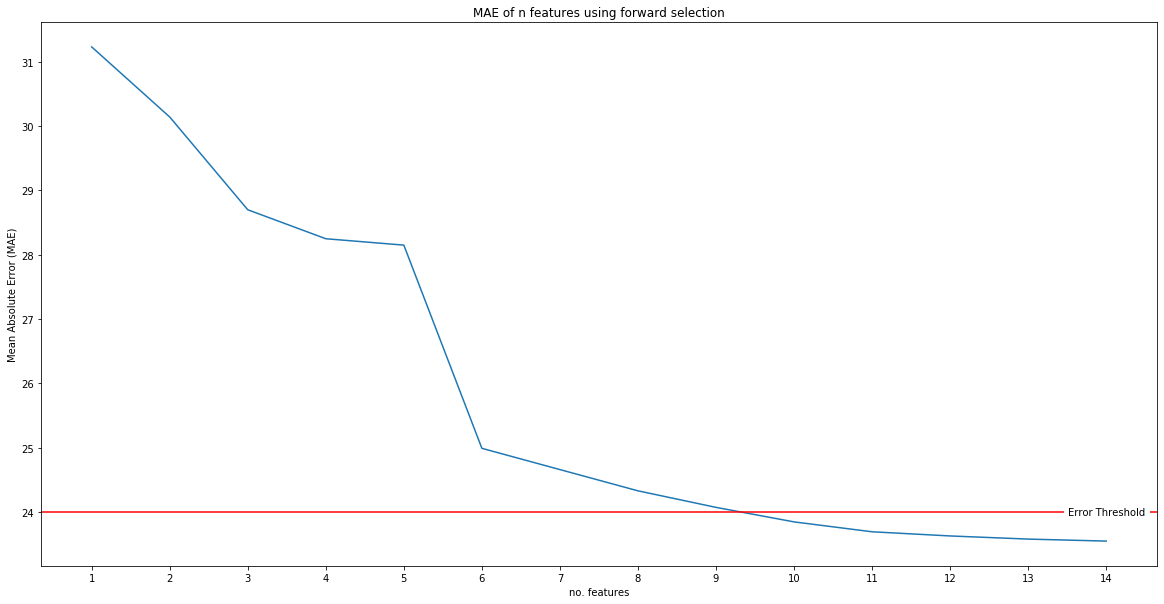

CPU times: user 21.4 s, sys: 1.59 s, total: 23 s
Wall time: 8.93 s


In [21]:
%%time
# Question 8
models_forward = ols.forward_selection(n=14)
assert round(models_forward[-1]["Error"],3) == 23.548, "Model error for 14 features is around 23.548"
errors = list(map(lambda x: x["Error"], models_forward))
err_threshold = 24
plt.figure(figsize=(20,10))
x = list(range(1,len(errors)+1))
plt.plot(x, errors)
plt.xticks(x)
plt.title("MAE of n features using forward selection")
plt.xlabel("no. features")
plt.ylabel("Mean Absolute Error (MAE)")
plt.axhline(y=err_threshold, color='r', linestyle='-',)
plt.text(14, err_threshold, 'Error Threshold', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.show()

In [22]:
next((i for i, j in enumerate(errors) if j < err_threshold), None) +1

10

In [23]:
%%time 

# Question 9
model_best_subset = ols.best_subset(k=3)
print(model_best_subset["Error"])


26.07274516709121
CPU times: user 26min 2s, sys: 1min 31s, total: 27min 33s
Wall time: 10min 16s
